학습목표

scikit-learn에 내장되어 있는 예제 데이터셋의 종류를 알고 활용할 수 있다.
scikit-learn에 내장되어 있는 분류 모델들을 학습시키고 예측해 볼 수 있다.
모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해
볼 수 있다. 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris =  load_iris()

In [4]:
print(type(dir(iris)))

# dir() 객체가 어떤 변수와 메서드를 가지고 있는지를 나열한다고 한다.

<class 'list'>


In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris_data = iris.data

In [7]:
# shape는 배열의 형상정보를 출력
print(iris_data.shape)

(150, 4)


In [8]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [9]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.filename

'C:\\Users\\HWANG\\anaconda3\\envs\\py3_7_6\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [14]:
import pandas as pd
print(pd.__version__)

1.1.3


In [15]:
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
iris_df['label'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(iris_data,
                                                   iris_label,
                                                   test_size=0.2,
                                                   random_state=7)

In [19]:
print('x_train 개수:', len(x_train), 'x_test 개수:', len(x_test))

x_train 개수: 120 x_test 개수: 30


In [20]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [21]:
x_test.shape, y_test.shape

((30, 4), (30,))

In [22]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

In [23]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [24]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=32)

In [25]:
y_pred = decision_tree.predict(x_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [26]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [29]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

In [30]:
x_train, x_test, y_train, y_test = train_test_split(iris_data,
iris_label,
test_size=0.2,
random_state=7)

In [31]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(iris_data,
iris_label,
test_size=0.2,
random_state=25)
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [33]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)


classifier


In [34]:
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.56      0.43         9
           1       0.00      0.00      0.00        13
           2       0.12      0.25      0.17         8

    accuracy                           0.23        30
   macro avg       0.16      0.27      0.20        30
weighted avg       0.14      0.23      0.17        30



C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

classifier


In [36]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         9
           1       0.00      0.00      0.00        13
           2       0.73      1.00      0.84         8

    accuracy                           0.57        30
   macro avg       0.40      0.67      0.49        30
weighted avg       0.34      0.57      0.42        30



C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

classifier


In [38]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [40]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [41]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<function matplotlib.pyplot.show(close=None, block=None)>

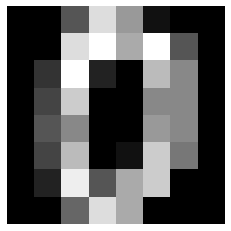

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show

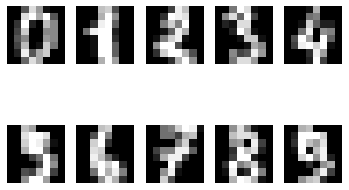

In [43]:
for i in range(10):
    plt.subplot(2, 5,i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [44]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,
new_label,
test_size=0.2,
random_state=15)
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

In [47]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]], dtype=int64)

In [53]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



In [55]:
print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HWANG\anaconda3\envs\py3_7_6\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

모델의 성능은 정확도만으로 평가하면 안된다. 특히, label이 불균형하게 분포되어 있는 데이터는 조심히 다루자!